In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, precision_score, recall_score, auc, precision_recall_curve, roc_auc_score, cohen_kappa_score, plot_precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/ssnar/Documents/ML/us_census_20200132.csv') 

# Replacing null values with mode

In [ ]:
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)

In [ ]:
data.shape

# OneHotEncoding on native-country because it has many values with same frequancy

In [5]:
data= pd.get_dummies(data=data, columns=['native-country'])

NameError: name 'data' is not defined

In [3]:
data = pd.read_csv('C:/Users/ssnar/Documents/ML/ohe.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Income-category
0,44,Private,111067,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,...,0,0,0,0,0,0,1,0,0,<=50K
1,25,Private,203871,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Wife,White,Female,...,0,0,0,0,0,0,1,0,0,>50K
2,17,Private,270942,HS-grad,9,Never-married,Other-service,Other-relative,White,Male,...,0,0,0,0,0,0,0,0,0,<=50K
3,50,Private,50178,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,...,0,0,0,0,0,0,1,0,0,>50K
4,43,State-gov,101383,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,...,0,0,0,0,0,0,1,0,0,>50K


# Frequancy Encoding on the categorical variables

In [4]:
##Calculating the frequencies of each categorical vaule for every attribute
data_workclass = data.workclass.value_counts().to_dict()
print('Workclass frequencies = ',data_workclass)
data_education = data.education.value_counts().to_dict()
print('Education frequencies = ',data_education)
data_maritalstatus = data['marital-status'].value_counts().to_dict()
print('MaritalStatus frequencies = ',data_maritalstatus)
data_occupation = data.occupation.value_counts().to_dict()
print('Occupation frequencies = ',data_occupation)
data_relationship = data.relationship.value_counts().to_dict()
print('Relationship frequencies = ',data_relationship)
data_race = data.race.value_counts().to_dict()
print('Race frequencies = ',data_race)
data_sex = data.sex.value_counts().to_dict()
print('Sex frequencies = ',data_sex)

Workclass frequencies =  {' Private': 2230, ' Self-emp-not-inc': 246, ' Local-gov': 205, ' State-gov': 132, ' Self-emp-inc': 110, ' Federal-gov': 75, ' Never-worked': 1, ' Without-pay': 1}
Education frequencies =  {' HS-grad': 1000, ' Some-college': 667, ' Bachelors': 461, ' Masters': 166, ' 11th': 117, ' Assoc-voc': 115, ' Assoc-acdm': 104, ' 10th': 82, ' 7th-8th': 64, ' Prof-school': 51, ' 5th-6th': 48, ' 9th': 40, ' Doctorate': 34, ' 12th': 32, ' 1st-4th': 13, ' Preschool': 6}
MaritalStatus frequencies =  {' Married-civ-spouse': 1354, ' Never-married': 991, ' Divorced': 423, ' Widowed': 99, ' Separated': 94, ' Married-spouse-abs': 36, ' Married-AF-spouse': 3}
Occupation frequencies =  {' Prof-specialty': 560, ' Exec-managerial': 377, ' Sales': 357, ' Craft-repair': 355, ' Adm-clerical': 343, ' Other-service': 295, ' Machine-op-inspct': 180, ' Transport-moving': 149, ' Handlers-cleaners': 147, ' Farming-fishing': 93, ' Tech-support': 70, ' Protective-serv': 58, ' Priv-house-serv': 15

In [5]:
## Replacing the categorical values for each attribute with their frequencies
data['workclass']=data['workclass'].map(data_workclass)
data['education']=data['education'].map(data_education)
data['marital-status']=data['marital-status'].map(data_maritalstatus)
data['occupation']=data['occupation'].map(data_occupation)
data['relationship']=data['relationship'].map(data_relationship)
data['race']=data['race'].map(data_race)
data['sex']=data['sex'].map(data_sex)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Income-category
0,44,2230,111067,667,10,1354,355,1199,2586,1989,...,0,0,0,0,0,0,1,0,0,<=50K
1,25,2230,203871,115,11,1354,560,142,2586,1011,...,0,0,0,0,0,0,1,0,0,>50K
2,17,2230,270942,1000,9,991,295,104,2586,1989,...,0,0,0,0,0,0,0,0,0,<=50K
3,50,2230,50178,1000,9,1354,70,1199,2586,1989,...,0,0,0,0,0,0,1,0,0,>50K
4,43,132,101383,1000,9,1354,355,1199,2586,1989,...,0,0,0,0,0,0,1,0,0,>50K


In [6]:
x = data.drop(labels = 'Income-category', axis =1)
y = data['Income-category']
y.value_counts()

 <=50K    2258
 >50K      742
Name: Income-category, dtype: int64

In [7]:
#Label encoding the target attribute
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
#Normalization using MinMax
norm = MinMaxScaler().fit(xTrain)
xscaledTrain = norm.transform(xTrain)
xscaledTest = norm.transform(xTest)

# Hyperparameter tunning for KNN

Fitting 12 folds for each of 6 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.8s finished


KNN BestScore for F1 =  0.548074037632532
Best parameters for KNN=  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
===================================KNN==================================
[[401  68]
 [ 59  72]]
Accuracy = 0.79
F1 Score =  0.5313653136531366
Precision =  0.5775396825396825
Recall =  0.5165394402035624
Precision-recall AUC =  0.5811186841148672
Cohen Kappa =  0.3948538754764931
ROC AUC =  0.7023144907957486
Classifcation report = 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       469
           1       0.51      0.55      0.53       131

    accuracy                           0.79       600
   macro avg       0.69      0.70      0.70       600
weighted avg       0.79      0.79      0.79       600



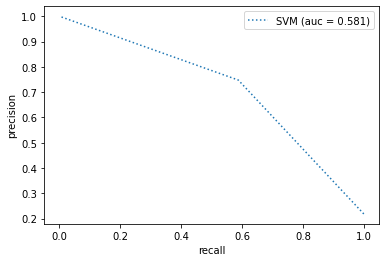

In [21]:
#Parameter grid for Knn
param_knn = {'n_neighbors':[1], 
              'metric':['euclidean','manhattan','minkowski'],
             'weights':['uniform','distance']}

#Grid search for Knn
knn_gs = GridSearchCV(KNeighborsClassifier(), param_knn, cv=12, verbose = 1, n_jobs = -1, scoring='f1')
knn_gs = knn_gs.fit(xscaledTrain,yTrain)
print('KNN BestScore for F1 = ',knn_gs.best_score_)
print('Best parameters for KNN= ',knn_gs.best_params_)

#KNN with best parameters on unseen test data
print('===================================KNN==================================')
kpred = knn_gs.predict(xscaledTest)
print(confusion_matrix(yTest, kpred))
knnprecision, knnrecall, knnthresholds = precision_recall_curve(yTest, kpred)
print('Accuracy = {0:4.2f}'.format(accuracy_score(yTest,kpred)))
print('F1 Score = ',f1_score(yTest,kpred))#, average = 'weighted'))
print('Precision = ', knnprecision.mean())
print('Recall = ', knnrecall.mean())
knn_oldpr = auc(knnrecall, knnprecision)
knn_oldck = cohen_kappa_score(yTest,kpred)
print('Precision-recall AUC = ',auc(knnrecall, knnprecision))
print('Cohen Kappa = ', cohen_kappa_score(yTest,kpred))
print('ROC AUC = ',roc_auc_score(yTest,kpred))
print('Classifcation report = \n', classification_report(yTest,kpred))


#plt.figure(figsize=(5, 5), dpi=100)
plt.plot(recall, precision, linestyle=':', label='SVM (auc = %0.3f)' % knn_oldpr)
#plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.show()

# Hyperparameter tunning of Decision Tree

Fitting 12 folds for each of 342 candidates, totalling 4104 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 4104 out of 4104 | elapsed:    7.1s finished


DecisionTree BestScore for F1 =  0.6553767500805338
Best parameters for DecisionTree=  {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9}
[[441  28]
 [ 54  77]]
Accuracy = 0.86
F1 Score =  0.6525423728813559
Precision =  0.6505555555555556
Recall =  0.5292620865139949
Precision-recall AUC =  0.705559796437659
Cohen Kappa =  0.5687615040757297
ROC AUC =  0.7640423835023358
Classifcation report = 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       469
           1       0.73      0.59      0.65       131

    accuracy                           0.86       600
   macro avg       0.81      0.76      0.78       600
weighted avg       0.86      0.86      0.86       600



NameError: name 'knnrecall' is not defined

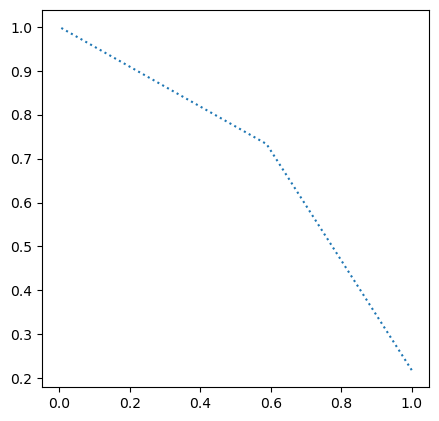

In [10]:
#Parameter grid for DecesionTree
param_dt = {'criterion':['gini','entropy'],
            'max_depth':list(range(1,20)),
            'max_leaf_nodes':list(range(1,10))}

#Grid search for DecesionTree
dt_gs = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=12, verbose = 1, n_jobs = -1, scoring='f1')
dt_gs = dt_gs.fit(xscaledTrain,yTrain)
print('DecisionTree BestScore for F1 = ',dt_gs.best_score_)
print('Best parameters for DecisionTree= ',dt_gs.best_params_)

#DecisionTree with best parameters on unseen test data
dpred = dt_gs.predict(xscaledTest)
print(confusion_matrix(yTest, dpred))
dtprecision, dtrecall, dtthresholds = precision_recall_curve(yTest, dpred)
print('Accuracy = {0:4.2f}'.format(accuracy_score(yTest,dpred)))
print('F1 Score = ',f1_score(yTest,dpred))#, average = 'weighted'))
print('Precision = ', dtprecision.mean())
print('Recall = ', dtrecall.mean())
dt_oldpr = auc(dtrecall, dtprecision)
dt_oldck = cohen_kappa_score(yTest,dpred)
print('Precision-recall AUC = ',auc(dtrecall, dtprecision))
print('Cohen Kappa = ', cohen_kappa_score(yTest,dpred))
print('ROC AUC = ',roc_auc_score(yTest,dpred))
print('Classifcation report = \n', classification_report(yTest,dpred))

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtrecall, dtprecision, linestyle=':', label='DT (auc = %0.3f)' % dt_oldpr)
plt.plot(knnrecall, knnprecision, linestyle=':', label='KNN (auc = %0.3f)' % knn_oldpr)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.show()

# Hyperparameter tunning for Neural Network

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.8min finished


NeuralNetwork BestScore for F1 =  0.6128085116284406
Best parameters for NeuralNetwork=  {'alpha': 0.01, 'hidden_layer_sizes': (150, 150), 'learning_rate_init': 0.01}
==============================NeuralNetwork=====================================
[[404  65]
 [ 34  97]]
Accuracy = 0.83
F1 Score =  0.6621160409556314
Precision =  0.6056995884773663
Recall =  0.5801526717557252
Precision-recall AUC =  0.6979450570163039
Cohen Kappa =  0.5545757221272383
ROC AUC =  0.8009326323670632
Classifcation report = 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       469
           1       0.60      0.74      0.66       131

    accuracy                           0.83       600
   macro avg       0.76      0.80      0.78       600
weighted avg       0.85      0.83      0.84       600



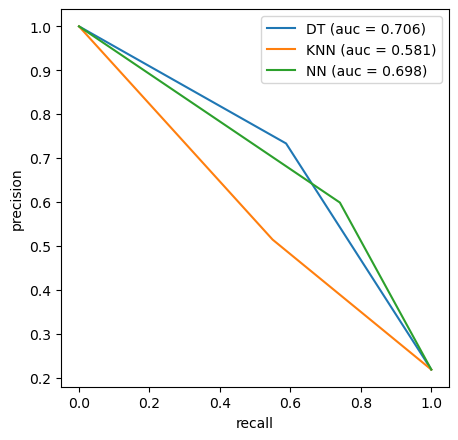

In [22]:
#Paramter grid for NeuralNetwork
param_mlp = {'alpha':[0.01, 0.5, 1, 5, 7],
             'learning_rate_init':[0.01, 0.5, 1],
             'hidden_layer_sizes':[(150,150)]}

#Grid search for NeuralNetwork
nn_gs = GridSearchCV(MLPClassifier(), param_mlp, cv=10, verbose = 1, n_jobs = -1, scoring='f1')
nn_gs = nn_gs.fit(xscaledTrain,yTrain)
print('NeuralNetwork BestScore for F1 = ',nn_gs.best_score_)
print('Best parameters for NeuralNetwork= ',nn_gs.best_params_)

#NeuralNetwork with best parameters on unseen test data
print('==============================NeuralNetwork=====================================')
npred = nn_gs.predict(xscaledTest)
print(confusion_matrix(yTest, npred))
nnprecision, nnrecall, nnthresholds = precision_recall_curve(yTest, npred)
print('Accuracy = {0:4.2f}'.format(accuracy_score(yTest,npred)))
print('F1 Score = ',f1_score(yTest,npred))#, average = 'weighted'))
print('Precision = ', nnprecision.mean())
print('Recall = ', nnrecall.mean())
nn_oldpr = auc(nnrecall, nnprecision)
nn_oldck = cohen_kappa_score(yTest,npred)
print('Precision-recall AUC = ',auc(nnrecall, nnprecision))
print('Cohen Kappa = ', cohen_kappa_score(yTest,npred))
print('ROC AUC = ',roc_auc_score(yTest,npred))
print('Classifcation report = \n', classification_report(yTest,npred))

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtrecall, dtprecision, linestyle='-', label='DT (auc = %0.3f)' % dt_oldpr)
plt.plot(knnrecall, knnprecision, linestyle='-', label='KNN (auc = %0.3f)' % knn_oldpr)
plt.plot(nnrecall, nnprecision, linestyle='-', label='NN (auc = %0.3f)' % nn_oldpr)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.show()

# Bagging Classifier

In [27]:
kbag = KNeighborsClassifier(**knn_gs.best_params_)
dbag = DecisionTreeClassifier(**dt_gs.best_params_)
nbag = MLPClassifier(alpha = 0.01, hidden_layer_sizes = (150,150), learning_rate_init= 0.01)
prauc = []
cohen = []
members = [2 ,4, 6, 8, 10, 12, 14, 16, 18, 20] #First check the best ensemble size
features = [0.1,0.25,0.5,0.75,1.0] #Then check best samplesize/feature size
for i in features:
    bag = BaggingClassifier(base_estimator = nbag, n_estimators= 20, max_features= i, random_state=0)
    bag = bag.fit(xscaledTrain,yTrain)
    bpred = bag.predict(xscaledTest)
    print(confusion_matrix(yTest, bpred))
    precision, recall, thresholds = precision_recall_curve(yTest, bpred)
    print('Accuracy = {0:4.2f}'.format(accuracy_score(yTest,bpred)))
    print('F1 Score = ',f1_score(yTest,bpred))#, average = 'weighted'))
    print('Precision = ', precision.mean())
    print('Recall = ', recall.mean())
    #newpr = auc(recall, precision)
    prauc.append(auc(recall, precision))
    print('Precision-recall AUC = ',auc(recall, precision))
    #newck = cohen_kappa_score(yTest,bpred) 
    cohen.append(cohen_kappa_score(yTest,bpred))
    print('Cohen Kappa = ', cohen_kappa_score(yTest,bpred) )



[[469   0]
 [131   0]]
Accuracy = 0.78
F1 Score =  0.0
Precision =  0.6091666666666666
Recall =  0.5
Precision-recall AUC =  0.6091666666666666
Cohen Kappa =  0.0
[[465   4]
 [ 87  44]]
Accuracy = 0.85
F1 Score =  0.49162011173184356
Precision =  0.7116666666666666
Recall =  0.44529262086514
Precision-recall AUC =  0.6987722646310432
Cohen Kappa =  0.4241964059731713
[[439  30]
 [ 55  76]]
Accuracy = 0.86
F1 Score =  0.6413502109704641
Precision =  0.645104821802935
Recall =  0.5267175572519084
Precision-recall AUC =  0.6944002352489317
Cohen Kappa =  0.5543048904114378
[[423  46]
 [ 53  78]]
Accuracy = 0.83
F1 Score =  0.6117647058823529
Precision =  0.6157885304659498
Recall =  0.5318066157760813
Precision-recall AUC =  0.6563927193630468
Cohen Kappa =  0.5071030270844397
[[425  44]
 [ 50  81]]
Accuracy = 0.84
F1 Score =  0.6328125
Precision =  0.6221111111111112
Recall =  0.539440203562341
Precision-recall AUC =  0.6748269720101782
Cohen Kappa =  0.533305750930906


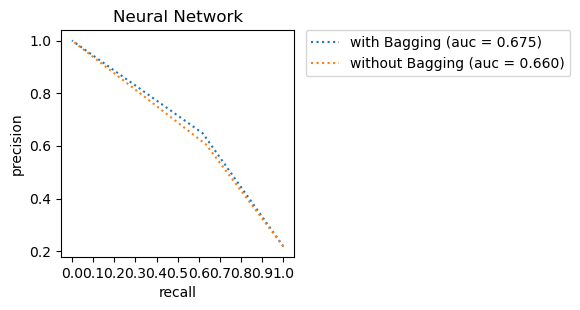

In [131]:
plt.figure(figsize=(3, 3), dpi=100)
plt.plot(recall, precision, linestyle=':', label='with Bagging (auc = %0.3f)' % max(prauc))
plt.plot(nnrecall, nnprecision, linestyle=':', label='without Bagging (auc = %0.3f)' % nn_oldpr)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Neural Network')
plt.legend(loc = 'upper left' , borderaxespad=0., bbox_to_anchor=(1.05, 1))
plt.show()

In [26]:
# To check best ensemble size
print('best performance with members = ', members[prauc.index(max(prauc))])
print('best performance with members = ', members[cohen.index(max(cohen))])

best performance with members =  20
best performance with members =  20


In [28]:
#To check best size of samples/features
print('best performance with features = ', features[prauc.index(max(prauc))])
print('best performance with features = ', features[cohen.index(max(cohen))])

best performance with features =  0.25
best performance with features =  0.5
